In [1]:
#import stuff we will need
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#import functions from my .py files
import acquire
import prepare 
import explore 
import evaluate 
import model
#Might needed or might be not 
import wrangle

In [2]:
#acquire our Zillow data from CodeUp server, and turn into .csv
df = acquire.get_zillow_data()

In [3]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,taxamount
0,14372057,2.0,2.5,1348.0,343967.0,1979.0,6059.0,3628.14
1,13929199,3.0,2.0,1221.0,367034.0,1955.0,6059.0,4589.60
2,12430095,3.0,2.0,1462.0,79713.0,1950.0,6037.0,1269.65
3,13033318,2.0,1.0,768.0,270458.0,1926.0,6037.0,3373.09
4,12079615,4.0,4.0,3696.0,940251.0,1989.0,6037.0,10313.18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   bedroomcnt                    52441 non-null  float64
 2   bathroomcnt                   52441 non-null  float64
 3   calculatedfinishedsquarefeet  52359 non-null  float64
 4   taxvaluedollarcnt             52440 non-null  float64
 5   yearbuilt                     52325 non-null  float64
 6   fips                          52441 non-null  float64
 7   taxamount                     52437 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.6 MB


In [5]:
#Using wrangle to get null-values check function
wrangle.miss_dup_values(df)

Your selected dataframe has 8 columns.
There are 4 columns that have missing values.
  
** There are 121 duplicate rows that represents 0.23% of total Values**


,Missing Values,% of Total Values
yearbuilt,116,0.2
calculatedfinishedsquarefeet,82,0.2
taxamount,4,0.0
taxvaluedollarcnt,1,0.0


In [6]:
#Using clean function from prepare
df = prepare.clean_zillow(df)

In [7]:
#Check again after cleanning
wrangle.miss_dup_values(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52196 entries, 0 to 52440
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcel_id        52196 non-null  object 
 1   number_bedroom   52196 non-null  float64
 2   number_bathroom  52196 non-null  float64
 3   sqft             52196 non-null  float64
 4   tax_value        52196 non-null  float64
 5   yearbuilt        52196 non-null  float64
 6   geographic_code  52196 non-null  int64  
 7   tax_amount       52196 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.6+ MB


In [9]:
prepare.unique_cntvalues(df, 30)

************************** COUNT OF UNIQUE VALUES ************************** 
Columns
 
parcel_id --> 52196 unique values
 
number_bedroom --> 14 unique values
 
number_bathroom --> 22 unique values
 
sqft --> 4720 unique values
 
tax_value --> 38846 unique values
 
yearbuilt --> 133 unique values
 
geographic_code --> 3 unique values
 
tax_amount --> 50722 unique values
 
 **************************  UNIQUE VALUES **************************
 
Uniques values of all the columns that have less than 30 unique values 
 
number_bedroom
0.0        57
1.0       604
2.0      8310
3.0     23290
4.0     15196
5.0      3964
6.0       632
7.0       106
8.0        24
9.0         8
10.0        2
11.0        1
12.0        1
14.0        1
Name: number_bedroom, dtype: int64
--------------------------- 
 
number_bathroom
0.0        41
1.0      9520
1.5       838
2.0     21834
2.5      3929
3.0     10641
3.5       911
4.0      2225
4.5       681
5.0       803
5.5       224
6.0       320
6.5        47
7.0

In [10]:
#Total of 25 properties with zero bedroom and bathroom
#We will keep these for now and check later if want to drop it
df[(df.number_bedroom == 0) & (df.number_bathroom == 0)]

,parcel_id,number_bedroom,number_bathroom,sqft,tax_value,yearbuilt,geographic_code,tax_amount
3036,12146026,0.0,0.0,280.0,963472.0,1953.0,6037,11016.31
3241,12227894,0.0,0.0,1208.0,185161.0,1990.0,6037,2558.37
4884,12664381,0.0,0.0,128.0,49859.0,1949.0,6037,849.72
10887,14121842,0.0,0.0,1454.0,151824.0,1912.0,6059,2397.46
14782,13841412,0.0,0.0,1567.0,226597.0,1914.0,6059,3004.76
15685,11953654,0.0,0.0,812.0,22102.0,1924.0,6037,387.66
18657,11712886,0.0,0.0,3087.0,631299.0,1947.0,6037,7731.90
20047,11266326,0.0,0.0,400.0,49627.0,1950.0,6037,703.30
20516,12038635,0.0,0.0,554.0,440000.0,1927.0,6037,5333.15
23674,14507431,0.0,0.0,4184.0,1145602.0,1964.0,6059,11761.22


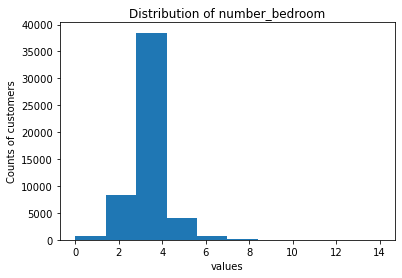

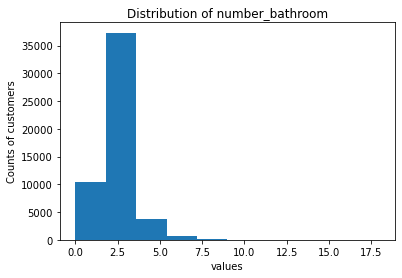

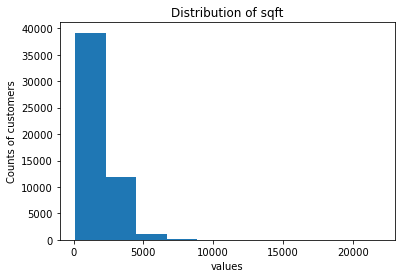

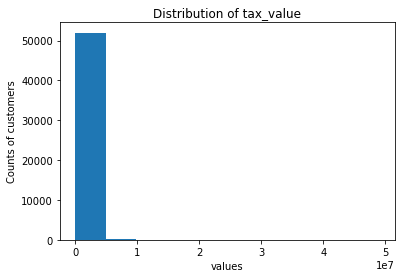

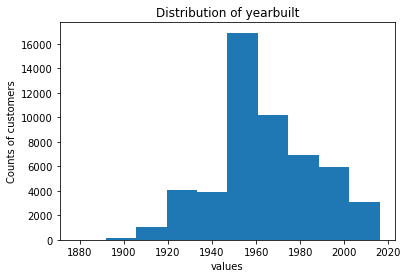

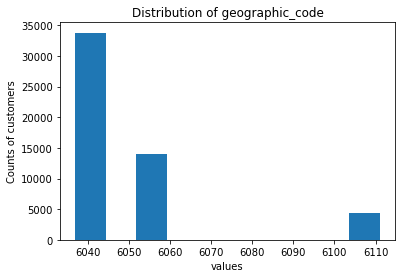

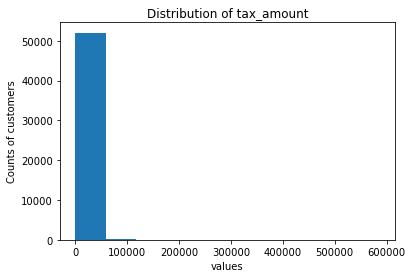

In [11]:
prepare.distribution(df)

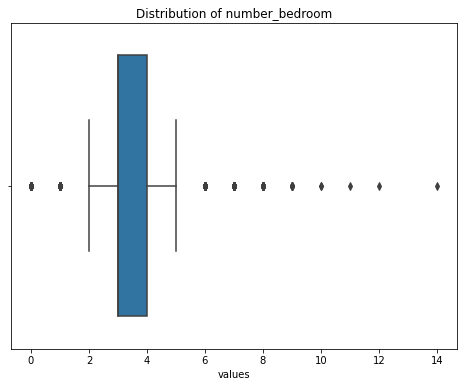

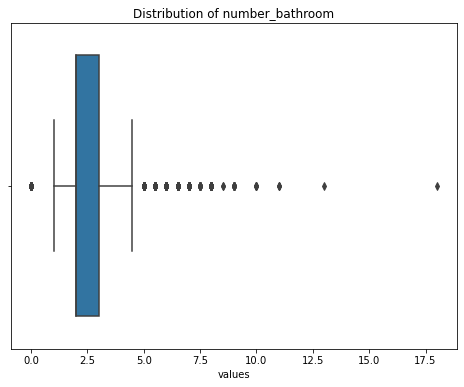

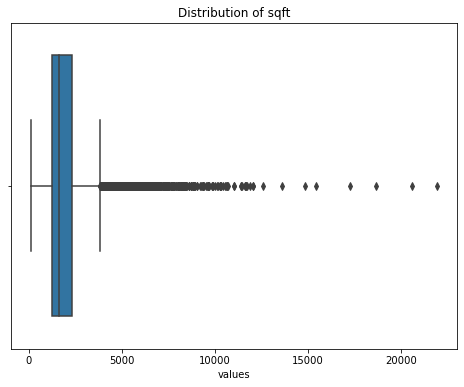

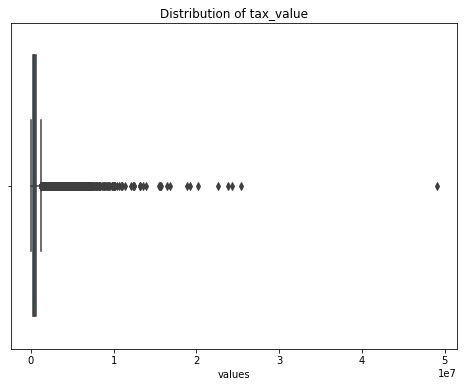

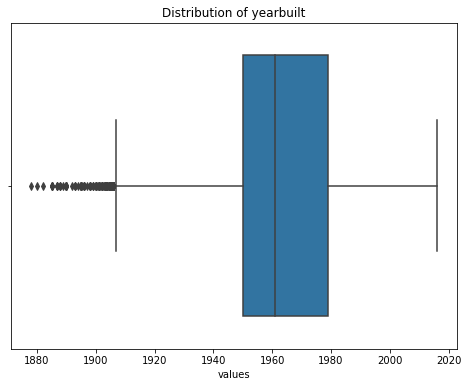

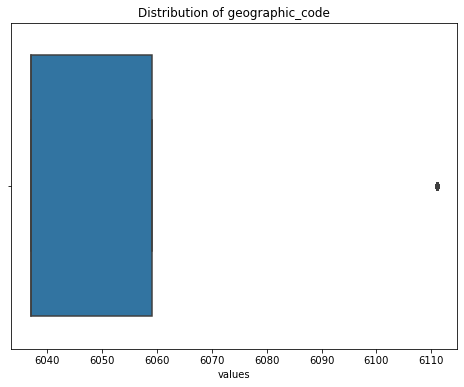

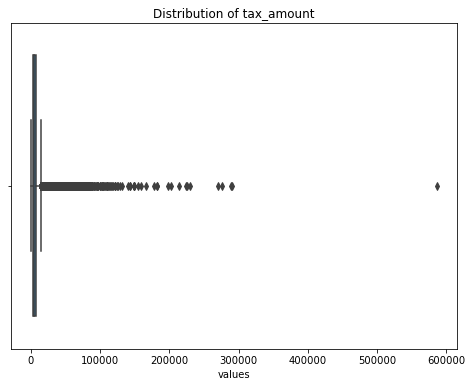

In [12]:
prepare.distribution_boxplot(df)

- Takeaways

    - number_bedroom, number_bathroom, sqft and tax_amount are continous.
    - our target is tax_value

- Clean data
    - Drop duplicates
    - Drop nulls
    - Change 'parcelid' to a string type
    - Rename columns

In [13]:
#Split the data in 3 dataframe
#Data is split into train (50%), validate (30%), and test (20%).
train, validate, test = prepare.split_data(df)

train -> (29229, 8)
validate -> (12527, 8)
test -> (10440, 8)


In [14]:
#split my features from my target
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_Xy(train,validate,test, 'tax_value')

X_train -> (29229, 7)               y_train->(29229,)
X_validate -> (12527, 7)         y_validate->(12527,) 
X_test -> (10440, 7)                  y_test>(10440,)


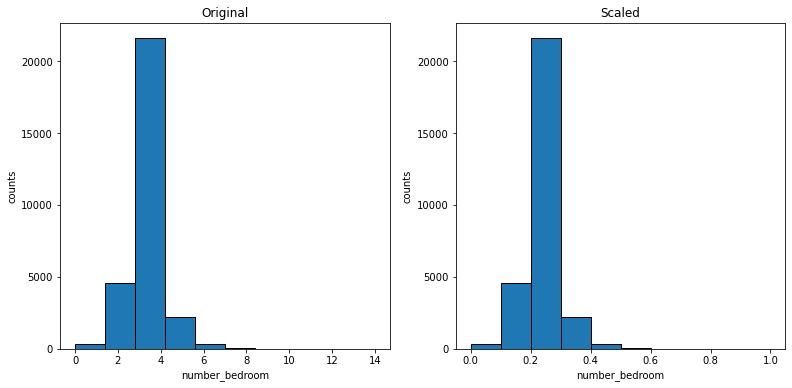

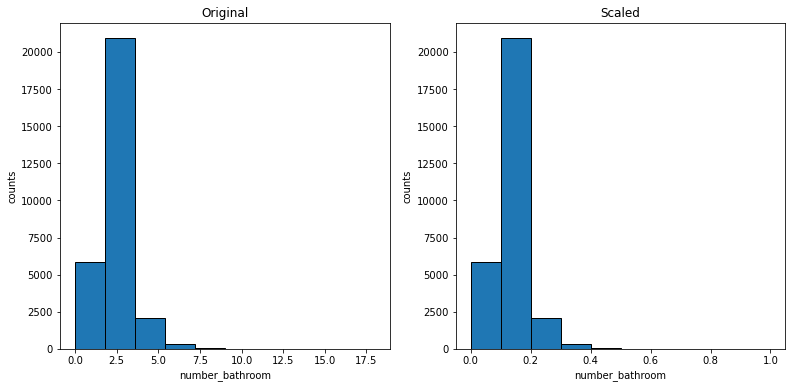

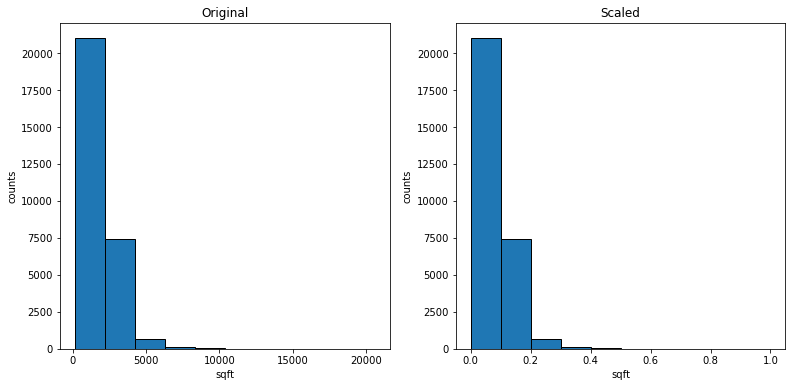

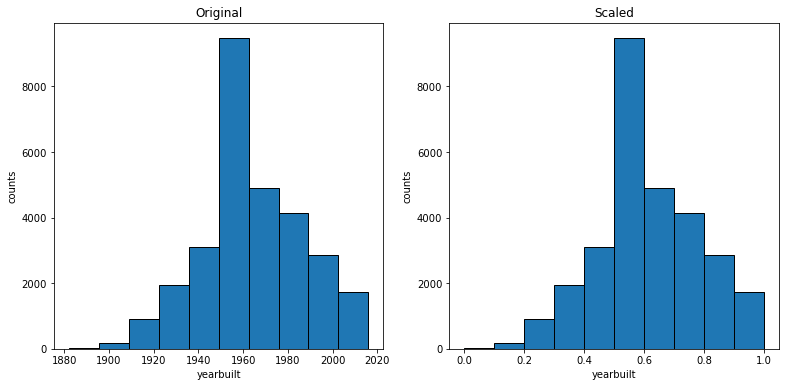

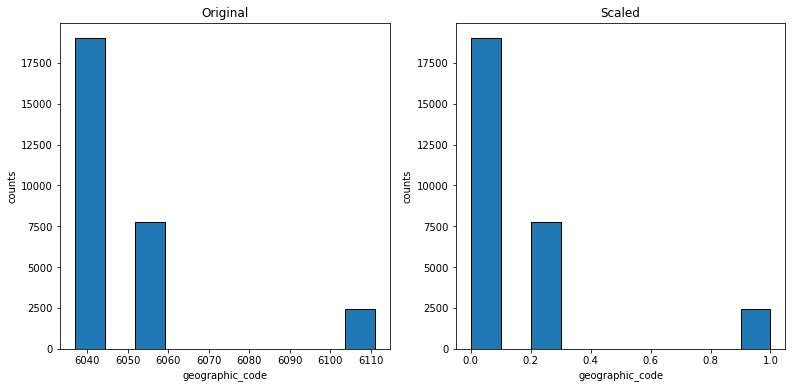

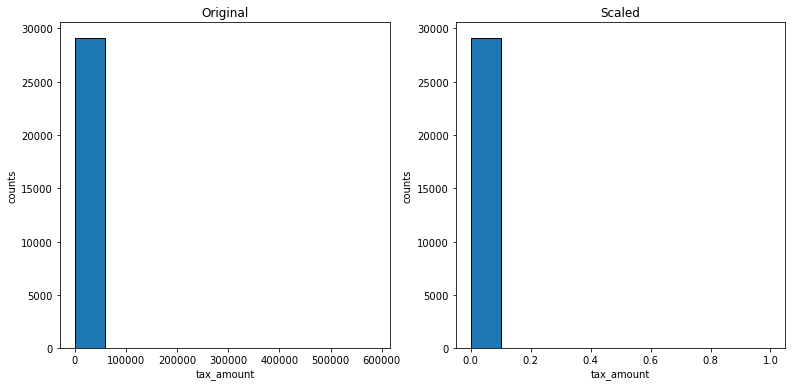

In [15]:
#Scale our data
X_train_scaled, X_validate_scaled, X_test_scaled = prepare.scaled_df(X_train, X_validate, X_test, MinMaxScaler())

Expolore
before Exploration this is what I think:

The variables that can influence the value of home are square feet, and number of bedrooms and at last number of bathrooms.
square feet, and number of bedrooms can have an influence no matter where the property located.

other factors can influence the value of a home such as zip code, year built, school district.

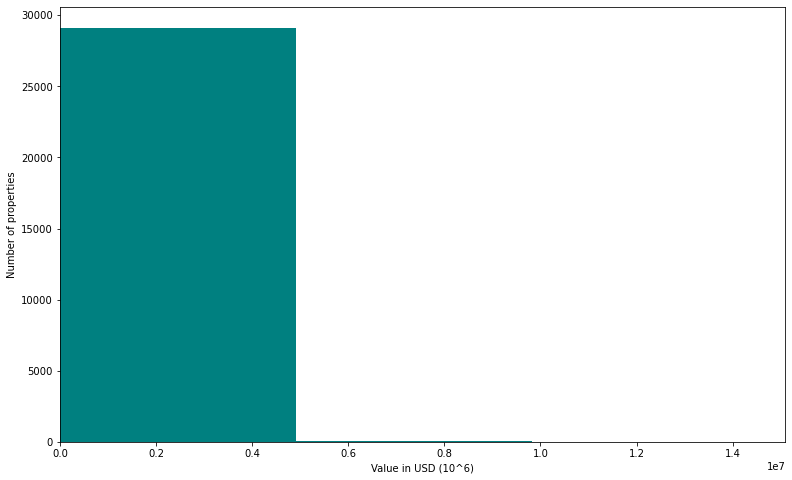

In [16]:
plt.figure(figsize=(13, 8))
train['tax_value'].hist(grid=False, color = 'teal')
plt.xlabel("Value in USD (10^6)")
plt.ylabel("Number of properties")                               
plt.xlim(0,.9 *(8**8))
plt.show()  

<AxesSubplot:xlabel='tax_value'>

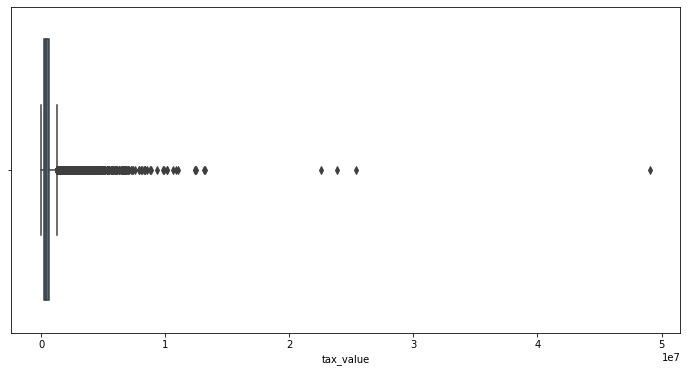

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(train['tax_value'])

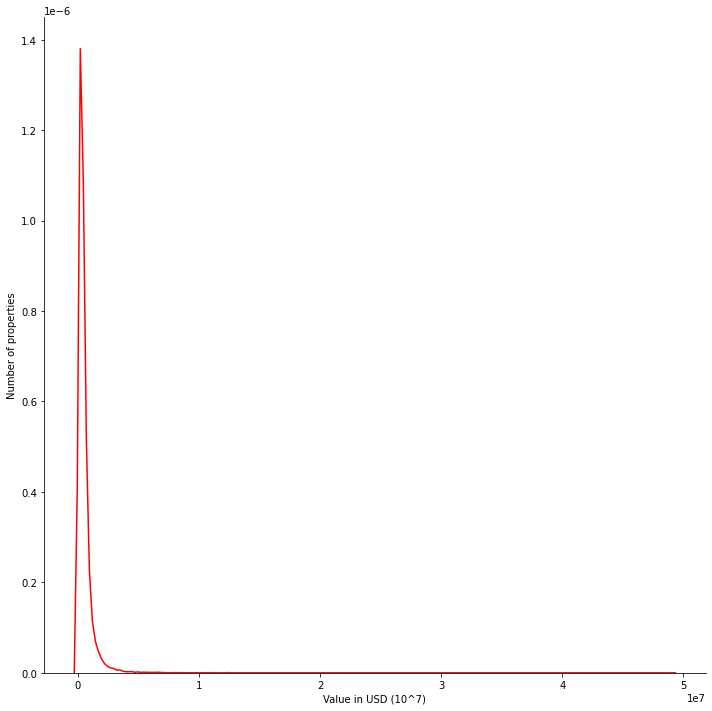

In [18]:
#plot our target
sns.displot(y_train,  kind="kde", height =10 ,aspect =1, color = 'red')
plt.xlabel("Value in USD (10^7)")
plt.ylabel("Number of properties")
plt.show()

In [19]:
# I creating a new df so it has target and scaled features
train_scaled = pd.concat([X_train_scaled, pd.DataFrame({'tax_value': y_train}) ], axis= 1 )

In [20]:
train_scaled.head()

,number_bedroom,number_bathroom,sqft,yearbuilt,geographic_code,tax_amount,tax_value
43991,0.142857,0.055556,0.040665,0.313433,0.000000,0.001156,51521.0
46736,0.214286,0.055556,0.038465,0.305970,0.000000,0.001719,40038.0
5967,0.285714,0.166667,0.094135,0.768657,0.297297,0.011072,556125.0
12627,0.214286,0.055556,0.039932,0.500000,0.000000,0.006848,312067.0
9903,0.142857,0.055556,0.037488,0.246269,1.000000,0.005045,258933.0


<AxesSubplot:title={'center':'Feautures Correlating with Value'}>

<Figure size 720x720 with 0 Axes>

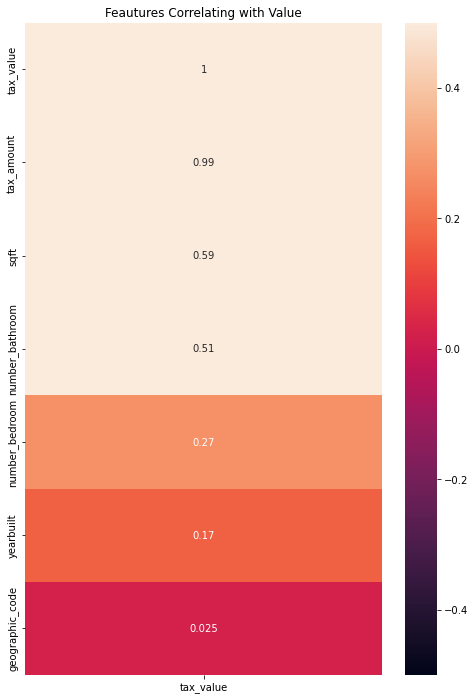

In [21]:
#let see the correlation
plt.figure(figsize=(10,10))
explore.get_zillow_heatmap(train_scaled)

<Figure size 1296x1152 with 0 Axes>

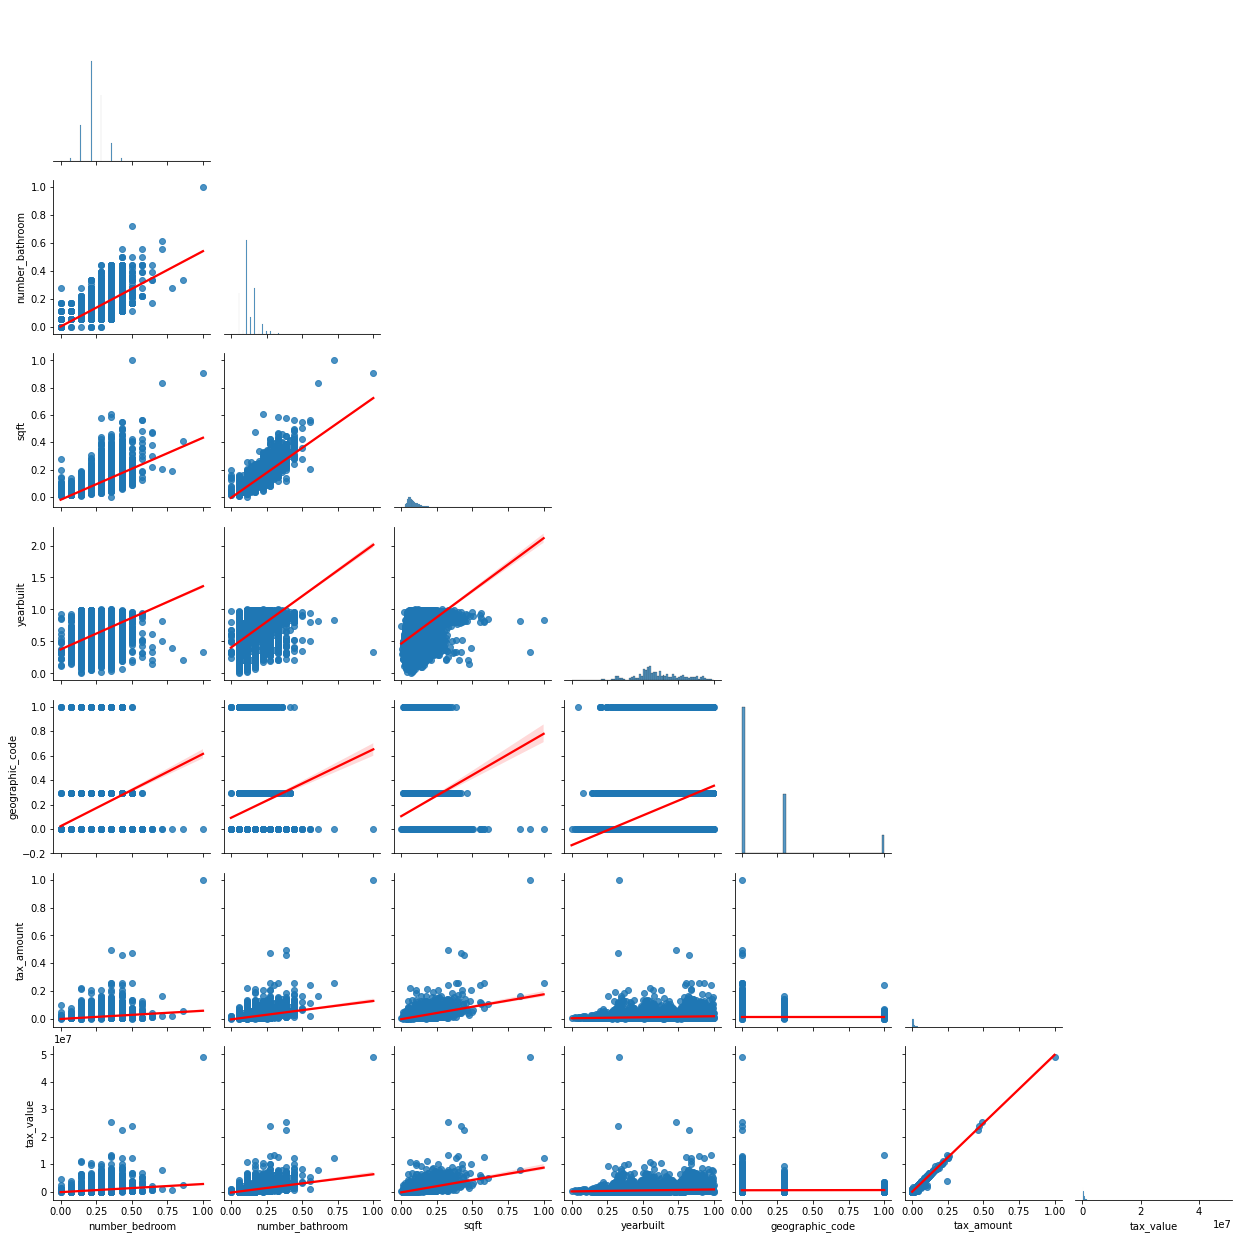

In [22]:
#as all my columns are continuous I use pairplot.
plt.figure(figsize=(18,16))
sns.pairplot(train_scaled, kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

Are bathrooms and bedrooms linearly correlated?

- 𝐻𝑜 : There is not a linear correlation between number of bathrooms and number of bedrooms for a property.
- 𝐻𝑎 : There is a linear correlation between number of bathrooms and number of bedrooms for a property.

In [23]:
# Set Significance Level
α = 0.05

In [24]:
r, p = stats.pearsonr(train_scaled.number_bedroom, train_scaled.number_bathroom)
r, p

(0.6480321277538643, 0.0)

In [25]:
if (p < α):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Text(-3, 8, 'Pearson r:0.6480\n p-stat: 0.00')

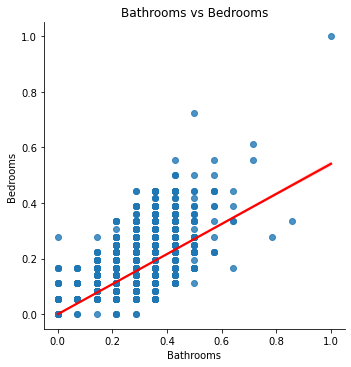

In [26]:
sns.lmplot(x = 'number_bedroom', y= 'number_bathroom', data = train_scaled, line_kws={'color': 'red'})
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.title('Bathrooms vs Bedrooms')
plt.annotate(f'Pearson r:{r:.4f}\n p-stat: {p:.2f}', xy =(-3, 8))

In [27]:
#using my function for SelectkBest
top_sb =model.select_kbest(X_train_scaled, y_train, 2)

The top 2 selected feautures based on the SelectKBest class are: ['sqft', 'tax_amount']


In [28]:
#using my function for RFE
top_rfe = model.select_rfe(X_train_scaled, y_train, 2,LinearRegression() )

The top 2 selected feautures based on the the RFE class class are: ['sqft', 'tax_amount']
sqft               1
tax_amount         1
number_bedroom     2
geographic_code    3
yearbuilt          4
number_bathroom    5
dtype: int64


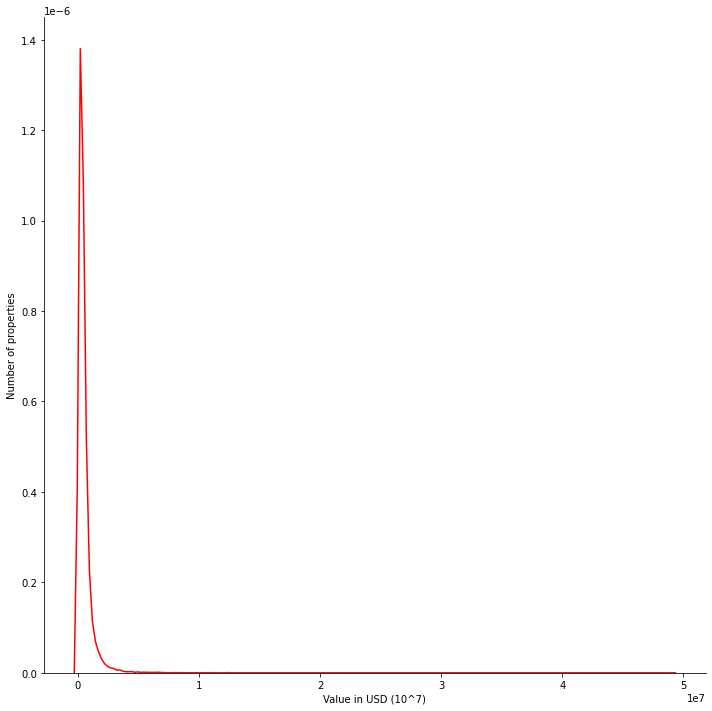

In [29]:
#plot our target
sns.displot(y_train,  kind="kde", height =10 , color = 'red')
plt.xlabel("Value in USD (10^7)")
plt.ylabel("Number of properties")
plt.show()

In [30]:
#conver y_train y _ validate to df
y_train = pd.DataFrame( {'actual': y_train})
y_validate = pd.DataFrame( {'actual': y_validate})
y_test = pd.DataFrame( {'actual': y_test})

Baseline

I wil check mean and median to calculate my baseline and I will select the one that has better rmse

In [31]:
y_train.mean(), y_train.median()

(actual    525710.860892
 dtype: float64,
 actual    372821.0
 dtype: float64)

In [32]:
#create baseline using mean (I'm using my function to calculate rmse)
tra_m = evaluate.baseline_errors(y_train, 'actual', 'mean')
tra_m['rmse']

737684.368614528

In [33]:
#let's calculate baseline in validate
val_m = evaluate.baseline_errors(y_validate, 'actual', 'mean')
val_m['rmse']

715616.0737392129

In [34]:
#create baseline using median
tra = evaluate.baseline_errors(y_train, 'actual', 'median')
tra['rmse']

753361.4917565548

In [35]:
#using median in validate
val = evaluate.baseline_errors(y_validate, 'actual', 'median')
val['rmse']

731250.0013961904

In [36]:
#I will select mean for my baseline
y_train.head()

,actual,yhat_baseline_mean,yhat_baseline_median
43991,51521.0,525710.860892,372821.0
46736,40038.0,525710.860892,372821.0
5967,556125.0,525710.860892,372821.0
12627,312067.0,525710.860892,372821.0
9903,258933.0,525710.860892,372821.0


In [37]:
metric_df = pd.DataFrame(data = [{
    'model': 'mean_baseline',
    'rmse_train' : tra['rmse'],
    'rmse_validate': val_m['rmse'],
    'rmse_difference' : abs(round(tra['rmse'] - val_m['rmse'], 4)),
    'r^2_validate' : val_m['r2']}])

In [38]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,753361.491757,715616.073739,37745.418,0.0


In [39]:
#using selected features with selectk best
ols_sb = model.create_model(X_train_scaled[top_sb], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
ols_sb['rmse']

103296.92395163706

In [40]:
#using my function for RFE
top_rfe = model.select_rfe(X_train_scaled, y_train, 2,LinearRegression(normalize=True) )

The top 2 selected feautures based on the the RFE class class are: ['sqft', 'tax_amount']
sqft               1
tax_amount         1
number_bedroom     2
geographic_code    3
yearbuilt          4
number_bathroom    5
dtype: int64


In [41]:
ols_rfe = model.create_model(X_train_scaled[top_rfe], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
ols_rfe['rmse']

103296.92395163706

In [42]:
#I will calcaulate validate with top_rfe 
ols_val = model.create_model(X_validate_scaled[top_rfe], y_validate, 'actual', LinearRegression(normalize=True), 'modelOLS' )

In [43]:
print('Train rmse:  ',ols_rfe['rmse'])
print('validate rmse', ols_val['rmse'])

Train rmse:   103296.92395163706
validate rmse 90706.56006636361


In [44]:
metric_df = metric_df.append(
    {
    'model': 'ols',
    'rmse_train': ols_rfe['rmse'],    
    'rmse_validate': ols_val['rmse'],
    'rmse_difference' : abs(round(ols_rfe['rmse'] - ols_val['rmse'], 4)),
    'r^2_validate' : ols_val['r2']}, ignore_index=True)

In [45]:
#using selected features with selectk best
lasso_sb = model.create_model(X_train_scaled[top_sb], y_train, 'actual', LassoLars(alpha=1), 'model_lasso' )
lasso_sb['rmse']

103297.10194948665

In [46]:
#using my function for RFE
top_rfe = model.select_rfe(X_train_scaled, y_train, 2,  LassoLars(alpha=1) )

The top 2 selected feautures based on the the RFE class class are: ['sqft', 'tax_amount']
sqft               1
tax_amount         1
number_bedroom     2
geographic_code    3
yearbuilt          4
number_bathroom    5
dtype: int64


In [47]:
#using my function for RFE
top_rfe = model.select_rfe(X_train_scaled, y_train, 2,  LassoLars(alpha=1) )

The top 2 selected feautures based on the the RFE class class are: ['sqft', 'tax_amount']
sqft               1
tax_amount         1
number_bedroom     2
geographic_code    3
yearbuilt          4
number_bathroom    5
dtype: int64


In [48]:
lasso_rfe = model.create_model(X_train_scaled[top_rfe], y_train, 'actual', LassoLars(alpha=1), 'model_lasso' )
lasso_rfe['rmse']

103297.10194948665

In [49]:
#validate
lasso_val = model.create_model(X_validate_scaled[top_rfe], y_validate, 'actual', LassoLars(alpha=1), 'model_lasso' )
lasso_val['rmse']

90706.64361779713

In [50]:
print('Train rmse:  ',lasso_rfe['rmse'])
print('validate rmse', lasso_val['rmse'])

Train rmse:   103297.10194948665
validate rmse 90706.64361779713


In [51]:
#train
glm_train = model.create_model(X_train_scaled[top_rfe], y_train, 
                           'actual', TweedieRegressor(power=0, alpha=0), 'model_glm' )

In [52]:
#validate
glm_val = model.create_model(X_validate_scaled[top_rfe], y_validate, 
                         'actual', TweedieRegressor(power=0, alpha=0), 'model_glm' )

In [53]:
print('Train rmse:  ',glm_train['rmse'])
print('validate rmse', glm_val['rmse'])

Train rmse:   103296.92395163706
validate rmse 90706.5600663636


In [54]:
metric_df = metric_df.append(
    {
    'model': 'lasso',
    'rmse_train': lasso_rfe['rmse'],
    'rmse_validate': lasso_val['rmse'],
    'rmse_difference' :abs( round(lasso_rfe['rmse'] - lasso_val['rmse'], 4)),
    'r^2_validate' : lasso_val['r2']}, ignore_index = True)

In [55]:
metric_df = metric_df.append(
    {
    'model': 'glm',
    'rmse_train' : glm_train['rmse'],   
    'rmse_validate': glm_val['rmse'],
    'rmse_difference' : abs(round(glm_train['rmse'] - glm_val['rmse'], 4)),
    'r^2_validate' : glm_val['r2']}, ignore_index = True)

In [56]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,753361.491757,715616.073739,37745.4180,0.000000
1,ols,103296.923952,90706.560066,12590.3639,0.983934
2,lasso,103297.101949,90706.643618,12590.4583,0.983622
3,glm,103296.923952,90706.560066,12590.3639,0.983934


In [57]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree = 2) 

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [58]:
#train
pol_reg_train =  model.create_model(X_train_degree2, y_train, 
                                'actual', LinearRegression(normalize=True), 'model_polreg' )

In [59]:
#validate
pol_reg_val =  model.create_model(X_validate_degree2, 
                              y_validate, 'actual',LinearRegression(normalize=True), 'model_polreg' )

In [60]:
print('Train rmse:  ',pol_reg_train['rmse'])
print('validate rmse', pol_reg_val['rmse'])

Train rmse:   96395.60905831544
validate rmse 83981.63919311101


In [61]:
metric_df = metric_df.append(
    {
    'model': 'pol_reg',
    'rmse_train': pol_reg_train['rmse'],
    'rmse_validate': pol_reg_val['rmse'],
    'rmse_difference' : abs(round(pol_reg_train['rmse'] - pol_reg_val['rmse'], 4)),
    'r^2_validate' : pol_reg_val['r2']},  ignore_index = True)

In [62]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,753361.491757,715616.073739,37745.4180,0.000000
1,ols,103296.923952,90706.560066,12590.3639,0.983934
2,lasso,103297.101949,90706.643618,12590.4583,0.983622
3,glm,103296.923952,90706.560066,12590.3639,0.983934
4,pol_reg,96395.609058,83981.639193,12413.9699,0.986228


In [64]:
model.report(metric_df)

These are the models that perform better than our baseline rmse: 715616.0737392129


,model,rmse_validate
1,ols,90706.560066
2,lasso,90706.643618
3,glm,90706.560066
4,pol_reg,83981.639193


-----------------------------------------------------------------------------------------------
   ********** The model with the less  rmse_validate  is pol_reg  rmse:83981.64 **********             
-----------------------------------------------------------------------------------------------
 
The model with r^2 validate closer to 1 is  pol_reg


,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,753361.491757,715616.073739,37745.4180,0.000000
1,ols,103296.923952,90706.560066,12590.3639,0.983934
2,lasso,103297.101949,90706.643618,12590.4583,0.983622
3,glm,103296.923952,90706.560066,12590.3639,0.983934
4,pol_reg,96395.609058,83981.639193,12413.9699,0.986228


In [65]:
pol_reg_test =  model.create_model(X_test_degree2, 
                              y_test, 'actual',LinearRegression(normalize=True), 'model_polreg' )

In [66]:
#Our best model is polynomial regression since is has the less rmse in validate
best_model = metric_df.drop([1,2,3], axis= 0)
best_model

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,753361.491757,715616.073739,37745.4180,0.000000
4,pol_reg,96395.609058,83981.639193,12413.9699,0.986228


In [67]:
best_model['rmse_test'] = pol_reg_test['rmse']
best_model.iloc[0,5] = 0

In [68]:
best_model

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate,rmse_test
0,mean_baseline,753361.491757,715616.073739,37745.4180,0.000000,0.000000
4,pol_reg,96395.609058,83981.639193,12413.9699,0.986228,98333.826482


takeaweays

I used mean for my baseline
my model that used PolynomialFeatures(degree = 2) and features(number_beroom, number_bathroom, sq_ft) was my best model.
RMSE for baseline is 715,616.073
RMSE for best model in test is 98,333.826
my model predict 13.74 % better than my baseline

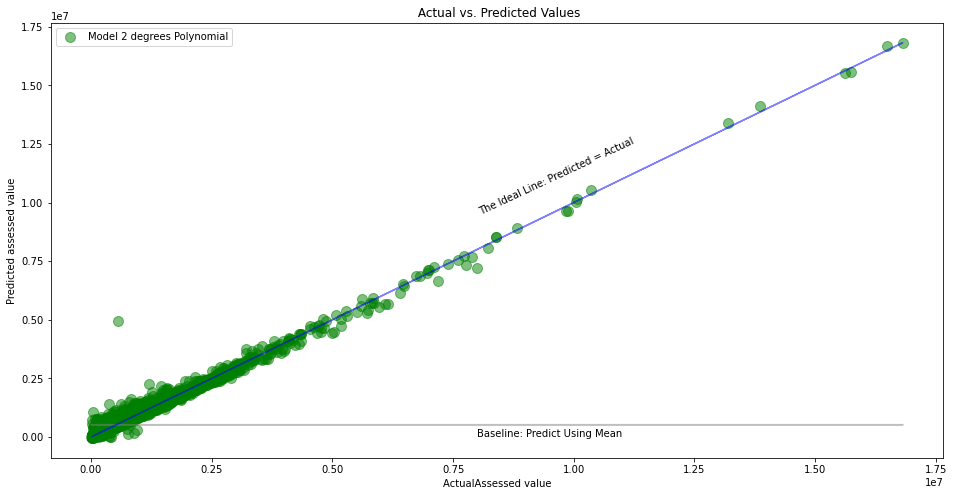

In [75]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.actual, y_validate.yhat_baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", ( 8000_000, 1))
plt.plot(y_validate.actual, y_validate.actual, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.8 *(10**7), .95 *(10**7)), rotation=25)

#plt.scatter(y_validate.actual, y_validate.modelOLS, 
#           alpha=.5, color="red", s=100, label="Model: LinearRegression")
#plt.scatter(y_validate.actual, y_validate.model_lasso, 
#            alpha=.5, color="blue", s=100, label="Model: LASSO")
#plt.scatter(y_validate.actual, y_validate.model_glm, 
#            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.actual, y_validate.model_polreg, 
            alpha=.5, color="green", s=100, label="Model 2 degrees Polynomial")
plt.legend()
plt.xlabel("ActualAssessed value")
plt.ylabel("Predicted assessed value")
plt.yscale(value = 'linear')
plt.title(" Actual vs. Predicted Values")

plt.show()

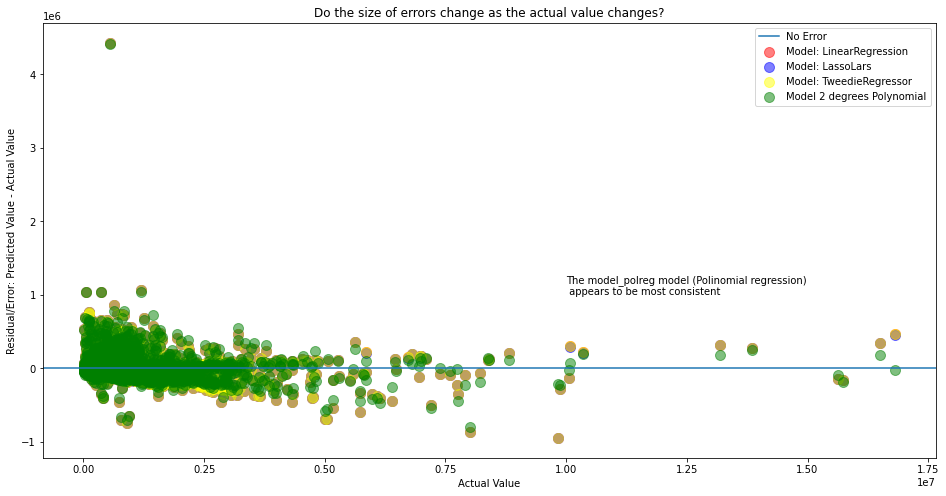

In [76]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.actual, y_validate.modelOLS - y_validate.actual, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.actual, y_validate.model_lasso - y_validate.actual, 
            alpha=.5, color="blue", s=100, label="Model: LassoLars")
plt.scatter(y_validate.actual, y_validate.model_glm - y_validate.actual, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.actual, y_validate.model_polreg - y_validate.actual, 
            alpha=.5, color="green", s=100, label="Model 2 degrees Polynomial")
plt.legend()
plt.xlabel("Actual Value")
plt.ylabel("Residual/Error: Predicted Value - Actual Value")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The model_polreg model (Polinomial regression)\n appears to be most consistent", ((10**7), .1 *(10**7)))
plt.show()